# GPS data converter: Degrees to UTM

<div style="background-color:black;color:white;padding:20px;">
<p>M. I. Pedro José Correa Caicedo</p>
</div>

### 1) Import libraries:

#### a) Processing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#### b) PROJ (cartographic projections and coordinate transformations library)

In [2]:
import pyproj
from pyproj import Proj

#### c) Time library

In [3]:
now = datetime.now()
fch= now.strftime("%Y-%m-%d-%H-%M-%S")

### 2) Import Data:

In [4]:
df=pd.read_csv('data_GPS.csv')

In [5]:
df.head()

,route,lat sensor,lon sensor
0,r1,20.537055,-100.815725
1,r1,20.537036,-100.815740
2,r1,20.537016,-100.815763
3,r1,20.536995,-100.815783
4,r1,20.536980,-100.815804


### 3) Separating data  :

#### a) Full vectors 

In [6]:
r=df['route']
lat=df['lat sensor']
lon=df['lon sensor']
Nr=len(r.unique())
print(Nr)
rn=r.unique()
print(rn[0])

1
r1


#### b) Vectors separated by route 

In [7]:
rv=[]
latv=[]
lonv=[]

for nr in range(Nr):
    ##build the list of lists 
    latv.append([])
    lonv.append([])
    rv.append([])
    for ru in range(len(r)):
        if(r[ru]=='r'+str(nr+1)):
            rv[nr].append(r[ru])
            latv[nr].append(lat[ru])
            lonv[nr].append(lon[ru])

print(np.shape(latv[0]))

(474,)


### 4) UTM transformations  :

#### a) Theoretical Considerations:

<img src="./images/zonas_utm.png" alt="haversine" width="900" height="700" />

##### Fig.1 UTM Zones.

Ref: http://www.dmap.co.uk/utmworld.pdf

The UTM representation is a projection of the latitude and longitude coordinates (in degrees) that are on the globe, sphere, towards a plane that is divided into zones as shown in Fig. 1. This transformation is possible thanks to several packages of equations that can be consulted at: https://upcommons.upc.edu/bitstream/handle/2117/77269/memoria.pdf

To avoid programming and solving these equation packages, the pyproj library for Python was developed, which delivers the data conversion practically directly.


##### Central point:

If the coordinates to convert are in the north of the equator line. the central point where the aquador's line meets the primordial meritian is: 

$ X=500000 [m] e Y=0 [m] $ (1)

And if the coordinates are south of the equator, the central point is given by: 

$X=500000 [m] e Y=10000000 [m] $ (2)

In this way you will always work with positive numbers.

##### Parameters:

To obtain the conversion the function "proj" from the library "pyproj" is necessary to give it the following values: 

$+proj= utm$; Get UTM coordinates.

$+zone=14Q$; UTM zone in which the data is located, you should see Fig 1 and select the zone corresponding to the data.

$+north$; if the data is north or south of the equator. to take into account the reference points for each case. see equations (1) and (2). 

$+ellps=WGS84$; reconstruct the coordinates with the equation of the ellipse for zone 14Q 

$+datum=WGS84$; datum for zone 14Q

$+units=m$; resulting units in meters.  

+no _ defs; function parameter. 

##### Ellipsoid and Datum:

Definitions:  https://www.nrcan.gc.ca/earth-sciences/geography/topographic-information/maps/national-topographic-system-maps/map-datum/9791


List of datums for each zone: https://spatialreference.org/ref/epsg/

#### b) Data conversion:

In [8]:
latutmv=[]
lonutmv=[]

for re in range(Nr):
    myProj = Proj("+proj=utm +zone=14Q, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
    lon_,lat_ = myProj(lonv[re], latv[re]) 
    print(np.shape(lat_),np.shape(lon_))
    latutmv.append(lat_)
    lonutmv.append(lon_)


(474,) (474,)


In [9]:
print(len(latutmv[0]))

474


#### c) Graphics:

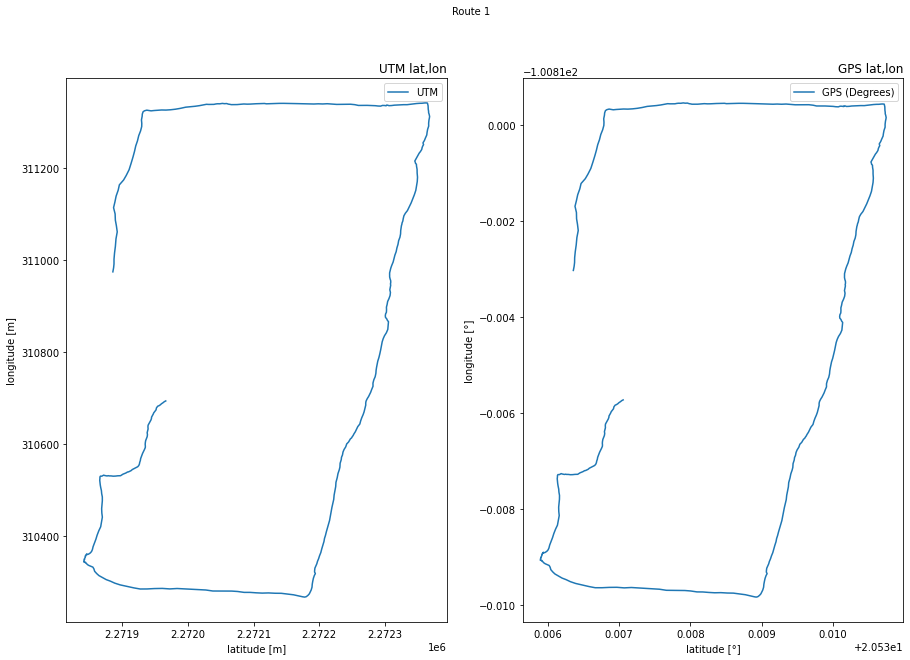

In [10]:
for gr in range(Nr):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle('Route'+' '+str(gr+1),fontsize=10) 
    
    ax[0].plot(latutmv[gr],lonutmv[gr],label='UTM')
    ax[0].set_title('UTM lat,lon',loc='right')
    ax[0].set(xlabel='latitude [m]',ylabel='longitude [m]')
    ax[0].legend(loc="upper right")
    
    ax[1].plot(latv[gr],lonv[gr],label='GPS (Degrees)')
    ax[1].set_title('GPS lat,lon',loc='right')
    ax[1].set(xlabel='latitude [°]',ylabel='longitude [°]')
    ax[1].legend(loc="upper right")
    
plt.show()

#### d) Data save:

In [11]:
for l in range(Nr):
    data = {
    'route': rv[l],
    'UTM lat': latutmv[l],
    'UTM lon':lonutmv[l]
    }
    df = pd.DataFrame(data, columns = ['route','UTM lat','UTM lon'])
    df.to_csv('UTM_Pos'+fch +'.csv', mode='a')